In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

import import_ipynb
from Polynome2p1 import *
import Fonctions_Test as FT

importing Jupyter notebook from Polynome2p1.ipynb
importing Jupyter notebook from Fonctions_Test.ipynb


In [2]:
fonctions_test = FT.fonctions("Sans Arg","Classic")

## Tests sur l'opérateur S

In [3]:
def test_approx_S(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,501)
    px, param_interpol,nb_iter = approxh(x,p,f,h,epsilon,s=s,ResidusNewton=ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.savefig("./Images/EtudesParamOpe/Operateurs/S/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Operateurs/S/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
    
    return px,fx

In [4]:
h = [1e-2,1,1/4]
p = [21,11,11]
epsilon = [1e-9,1e-5,1e-9]
fonctions = FT.fonctions_etude_S()

############################################################################################################
######################        Fonction absolu_h_retard, p = 21, h = 0.01, epsilon = 1e-09     #######################
############################################################################################################


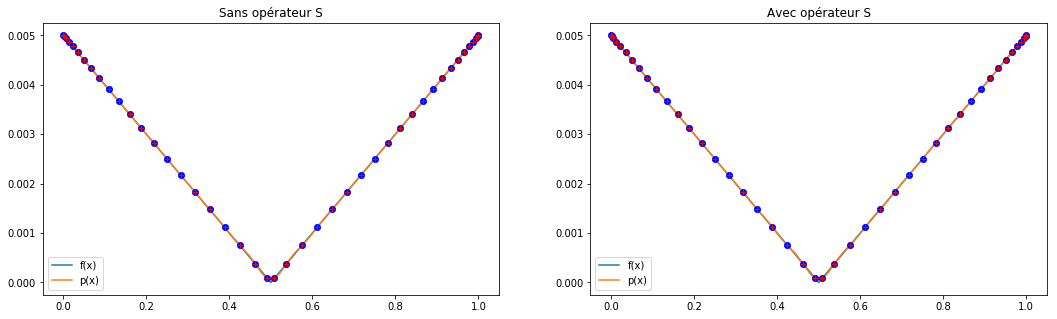

Sans opérateur Séparateur : 
     Norme 2 : 0.00019487146781056348
     Trapezes : 5.202885415286245e-06
Avec opérateur Séparateur : 
     Norme 2 : 0.00019487146781056348
     Trapezes : 5.202885415286245e-06

############################################################################################################
######################        Fonction abs_poly_h_7, p = 11, h = 1, epsilon = 1e-05     #######################
############################################################################################################


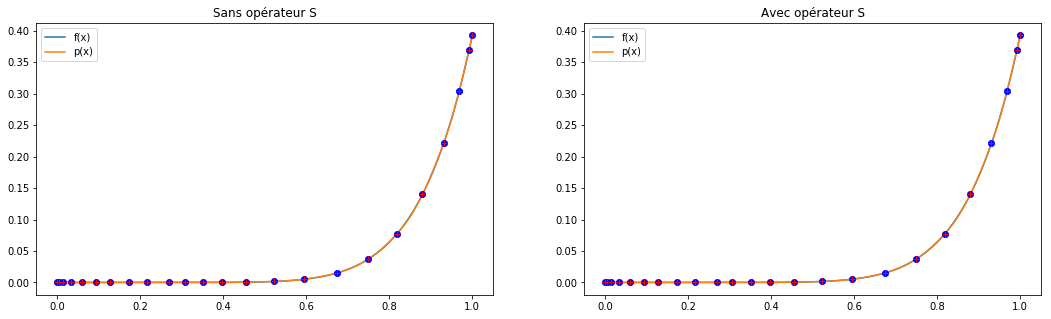

Sans opérateur Séparateur : 
     Norme 2 : 0.009420561143478633
     Trapezes : 0.000217929291529639
Avec opérateur Séparateur : 
     Norme 2 : 0.009420561143478633
     Trapezes : 0.000217929291529639

############################################################################################################
######################        Fonction gaussienne_h, p = 11, h = 0.25, epsilon = 1e-09     #######################
############################################################################################################


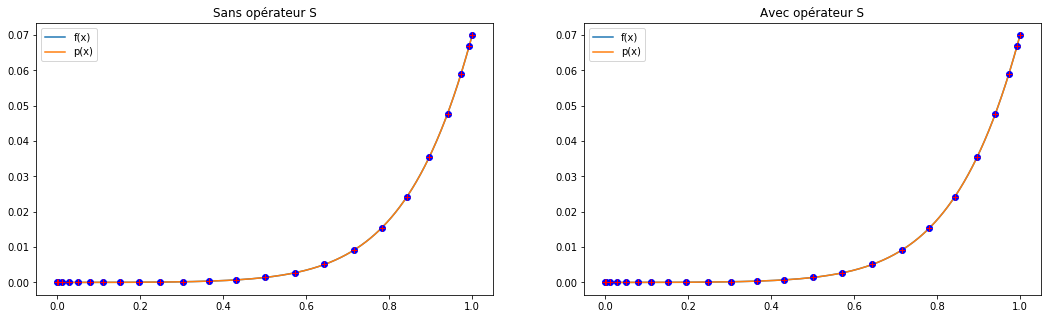

Sans opérateur Séparateur : 
     Norme 2 : 8.959228056073182e-05
     Trapezes : 2.400109478779723e-06
Avec opérateur Séparateur : 
     Norme 2 : 8.959228056073182e-05
     Trapezes : 2.400109478779723e-06



In [5]:
for i in range(3):
    name = str(fonctions[i]).split(' ')[1]
    print("############################################################################################################")
    print("######################        Fonction "+name+", p = "+str(p[i])+", h = "+str(h[i])+", epsilon = "\
          +str(epsilon[i])+"     #######################")
    print("############################################################################################################")
    plt.figure(0,figsize=(18,5))
    plt.subplot(1,2,1)
    sansS = test_approx_S(p[i],fonctions[i],h[i],epsilon[i],1,1)
    plt.title("Sans opérateur S")
    plt.subplot(1,2,2)
    avecS = test_approx_S(p[i],fonctions[i],h[i],epsilon[i],1,1)
    plt.title("Avec opérateur S")
    plt.show()
        
    print("Sans opérateur Séparateur : ")
    print("     Norme 2 :", npl.norm(sansS[0]-sansS[1]))
    print("     Trapezes :", trapezes(sansS[0]-sansS[1]))
    print("Avec opérateur Séparateur : ")
    print("     Norme 2 :", npl.norm(avecS[0]-avecS[1]))
    print("     Trapezes :",trapezes(sansS[0]-sansS[1]))
    print()

## Effet du point initial

In [6]:
def test_approx_init(p,f,h,epsilon,init,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,501)
    px, param_interpol,nb_iter = approxh(x,p,f,h,epsilon,init=init,s=s,ResidusNewton=ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.savefig("./Images/EtudesParamOpe/Operateurs/Init/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Operateurs/Init/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
    return px,fx,nb_iter

In [7]:
def X_equi(p):
    x = np.linspace(0,0.5,2*(p+1))
    X = np.zeros(2*(p+1))
    X[:p+1] = x[1::2]
    X[p+1:] = x[::2] 
    return X

################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Erreur
X est devenu négatif ou supérieur à 1


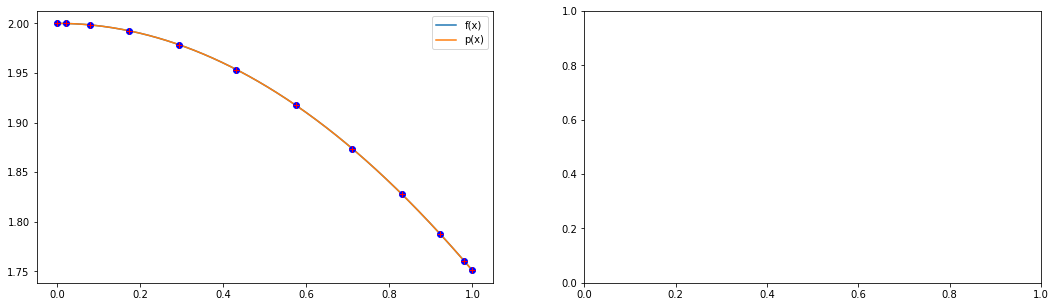

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  1.3026334691977512e-08     -1.0
    Norme inf :  1.0293721430798541e-09     -1.0
    Trapeze :  5.015620387904819e-10     -1.0
    Nb_iteration :  8.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Erreur
X est devenu négatif ou supérieur à 1


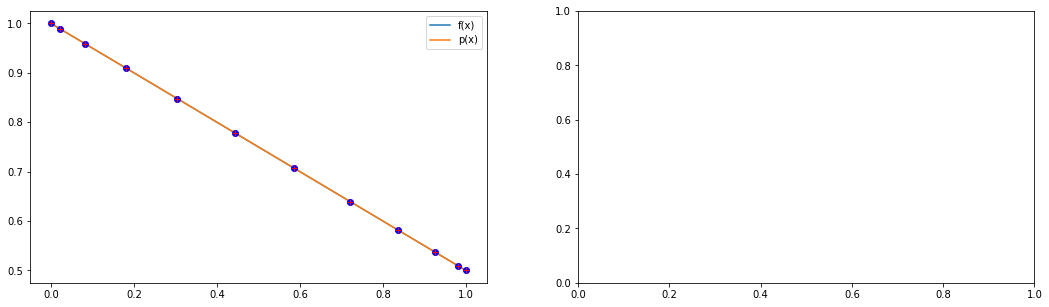

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  7.654905232329678e-15     -1.0
    Norme inf :  1.4432899320127035e-15     -1.0
    Trapeze :  2.0083934515469054e-16     -1.0
    Nb_iteration :  15.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Erreur
X est devenu négatif ou supérieur à 1


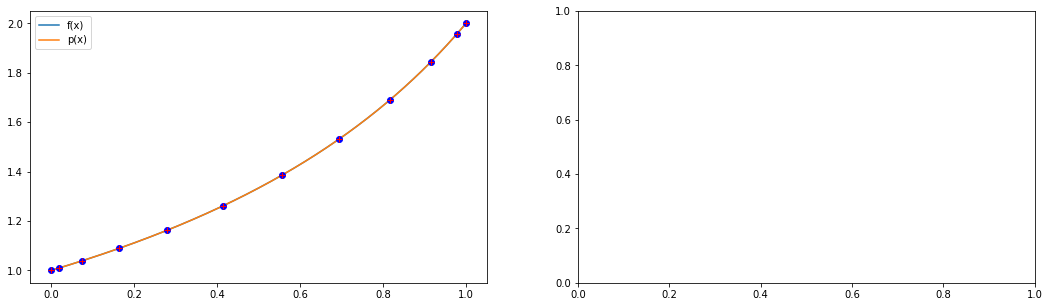

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  4.7518304980806555e-08     -1.0
    Norme inf :  4.0880629992301465e-09     -1.0
    Trapeze :  1.7853020852776067e-09     -1.0
    Nb_iteration :  16.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Erreur
X est devenu négatif ou supérieur à 1


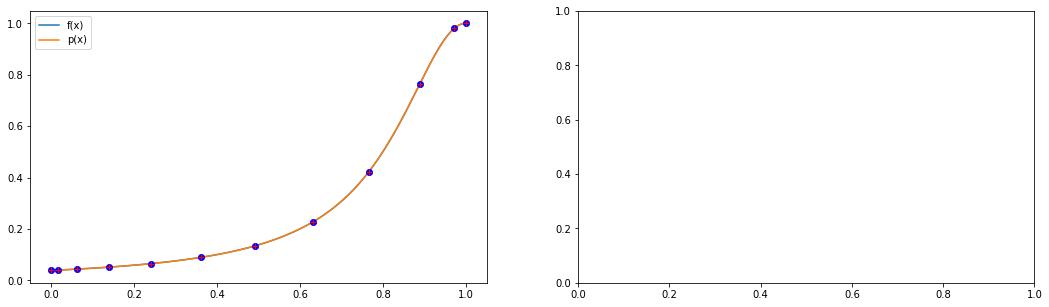

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  0.012703977961882865     -1.0
    Norme inf :  0.00176540848608997     -1.0
    Trapeze :  0.0003347610672685893     -1.0
    Nb_iteration :  72.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Erreur
X est devenu négatif ou supérieur à 1


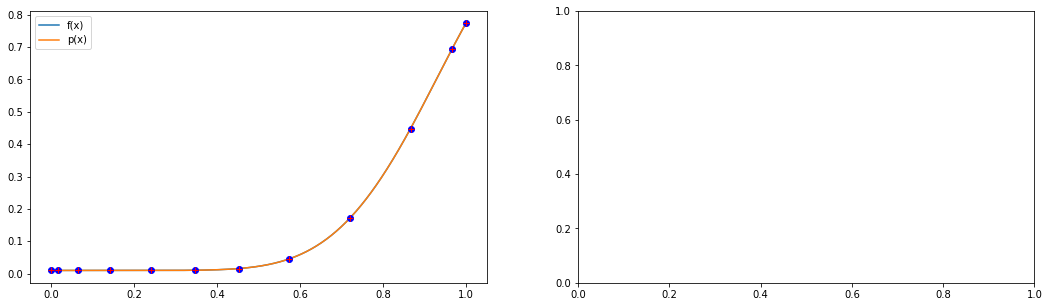

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  6.0937746502428926e-05     -1.0
    Norme inf :  9.682058094817592e-06     -1.0
    Trapeze :  1.3843476926009136e-06     -1.0
    Nb_iteration :  100.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Erreur
X est devenu négatif ou supérieur à 1


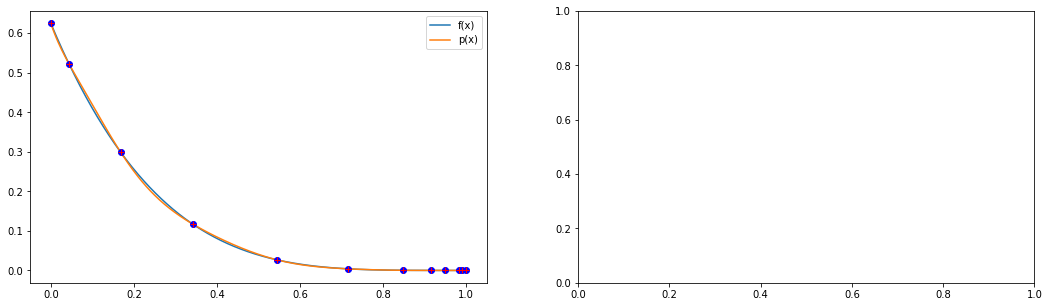

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  0.07902397696935184     -1.0
    Norme inf :  0.009496827582903378     -1.0
    Trapeze :  0.002318355106043923     -1.0
    Nb_iteration :  100.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Erreur
X est devenu négatif ou supérieur à 1


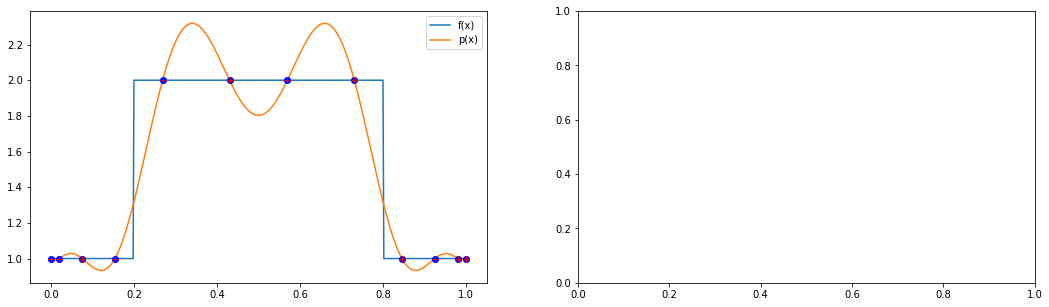

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  4.6921367460875985     -1.0
    Norme inf :  0.6807253639296469     -1.0
    Trapeze :  0.15090471142633138     -1.0
    Nb_iteration :  17.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Erreur
X est devenu négatif ou supérieur à 1


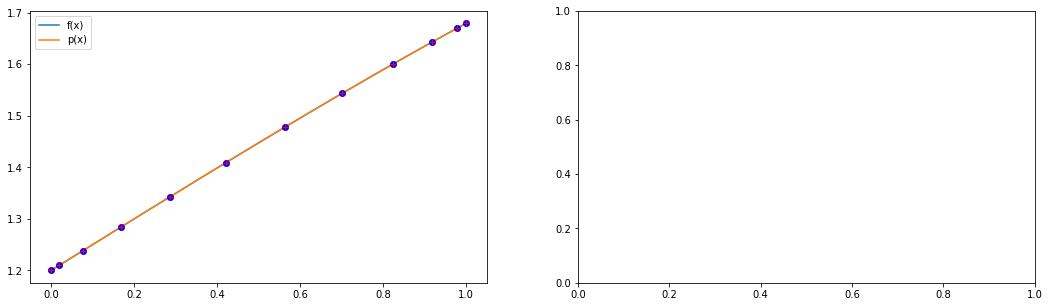

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  1.481555084624755e-14     -1.0
    Norme inf :  1.9984014443252818e-15     -1.0
    Trapeze :  4.418687638008124e-16     -1.0
    Nb_iteration :  11.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Erreur
X est devenu négatif ou supérieur à 1


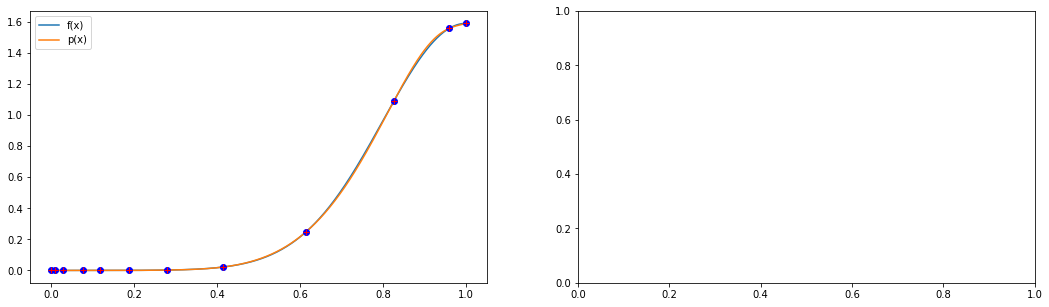

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  0.12621440110531337     -1.0
    Norme inf :  0.015274026618016912     -1.0
    Trapeze :  0.0033803033792646903     -1.0
    Nb_iteration :  100.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Erreur
X est devenu négatif ou supérieur à 1


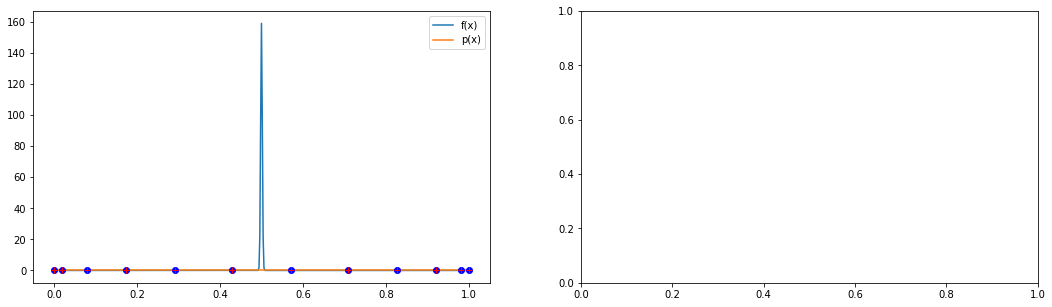

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  211.8995633303015     -1.0
    Norme inf :  159.15494309089536     -1.0
    Trapeze :  0.7978845660079886     -1.0
    Nb_iteration :  1.0     -1.0




In [8]:
   h = 1/2
p = 5
epsilon = 1e-9
fonctions = FT.fonctions("Sans Arg")
init = [init_X,X_equi]
Err = -1 * np.ones((len(fonctions),len(init),4))
    

for f in range(len(fonctions)) : 
    print("################################################################################################")
    print(("##########    Fonction "+str(fonctions).split(' ')[1]+", Init = "+ str(init).split(' ')[1]+", h ="+str(h)+\
    ", p"+str(p)+", eps = "+str(epsilon)+"        ################"))
    print("################################################################################################")
    plt.figure(figsize=(18,5))
    for i in range(len(init)) : 
        plt.subplot(1,2,i+1)
        try : 
            px,fx,nb_iter = test_approx_init(p,fonctions[f],h,epsilon,init[i],1)
            Err[f,i,0] = npl.norm(px-fx) 
            Err[f,i,1] = npl.norm(px-fx,np.inf)
            Err[f,i,2] = trapezes(px-fx)
            Err[f,i,3] = nb_iter
        except ValueError:
            print("Erreur\nX est devenu négatif ou supérieur à 1")
    plt.show()
    print("Erreur pour init_x et x_equi (respectivement): ")
    print("    Norme 2 : ", Err[f,0,0],"   ", Err[f,1,0])
    print("    Norme inf : ", Err[f,0,1],"   ", Err[f,1,1])
    print("    Trapeze : ", Err[f,0,2],"   ", Err[f,1,2])
    print("    Nb_iteration : ", Err[f,0,3],"   ", Err[f,1,3])
    print("\n")
       ##peut etre faire la différence entre les deux resultats